In [3]:
from random import random, randint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [7]:
#Creating values for FeNO with 3 classes:
FeNO_0 = np.random.normal(15,20, 100)
FeNO_1 = np.random.normal(35,20, 100)
FeNO_2 = np.random.normal(65, 20, 100)

#Creating values for FEV1 with 3 classes:
FEV1_0 = np.random.normal(4.50, 1, 100)
FEV1_1 = np.random.normal(3.75, 1.2, 100)
FEV1_2 = np.random.normal(2.35, 1.2, 100)

#Creating values for Broncho Dilation with 3 classes:
BD_0 = np.random.normal(150,50, 100)
BD_1 = np.random.normal(250,50,100)
BD_2 = np.random.normal(350, 50, 100)

#Creating labels variable with three classes:(2)disease (1)possible disease (0)no disease:
not_asthma = np.zeros((100,), dtype=int)
poss_asthma = np.ones((100,), dtype=int)
asthma = np.full((100,), 2, dtype=int)

In [8]:
#Concatenate classes into one variable:
FeNO = np.concatenate([FeNO_0, FeNO_1, FeNO_2])
FEV1 = np.concatenate([FEV1_0, FEV1_1, FEV1_2])
BD = np.concatenate([BD_0, BD_1, BD_2])
dx = np.concatenate([not_asthma, poss_asthma, asthma])

#Create DataFrame:
df = pd.DataFrame()

#Add variables to DataFrame:
df['FeNO'] = FeNO.tolist()
df['FEV1'] = FEV1.tolist()
df['BD'] = BD.tolist()
df['dx'] = dx.tolist()

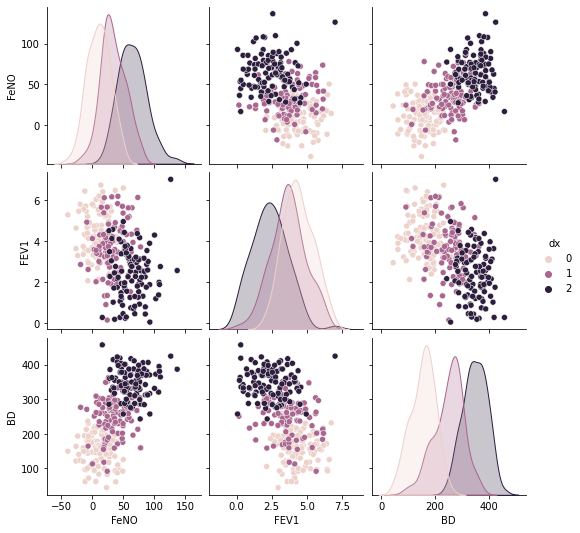

In [9]:
sns.pairplot(df, kind="scatter", hue="dx")
plt.show()

In [10]:
X = df.drop('dx', axis=1)
y = df['dx']

#Data split into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [11]:
#Fit Logistic Regression model:
logisticregression = LogisticRegression().fit(X_train, y_train)

#Evaluate Logistic Regression model:
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))
print("coefficients shape: ", logisticregression.coef_.shape)
print("intercept shape: ", logisticregression.intercept_.shape)

training set score: 0.870370
test set score: 0.833333
coefficients shape:  (3, 3)
intercept shape:  (3,)


In [12]:
#Fit Logistic Regression model:
logisticregression = LogisticRegression(C=1, multi_class='ovr', max_iter=100).fit(X_train, y_train)

#Evaluate Logistic Regression model:
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.877778
test set score: 0.900000


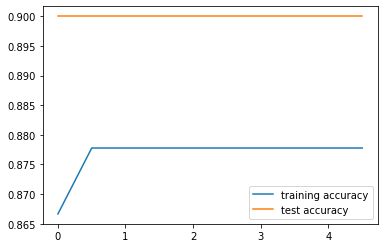

In [16]:
training_accuracy = []
test_accuracy = []# try c values from 0.001 to 100:
c_settings = np.arange(0.001, 5, 0.5)

for i in c_settings:
    # build the model
    clf = LogisticRegression(C=i, multi_class='ovr', max_iter=1000)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.legend()

0.8533333333333334


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


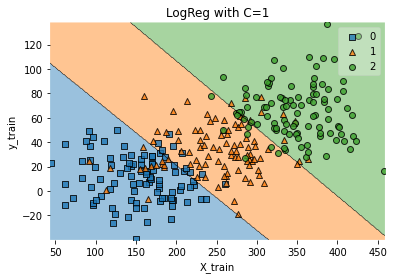

In [18]:
def logisticReg_comparison(data,c):
    x = data[['BD','FeNO',]].values
    y = data['dx'].astype(int).values
    LogReg = LogisticRegression(C=c, multi_class='multinomial',
                                                      max_iter=1000)
    LogReg.fit(x,y)
    print(LogReg.score(x,y))
    #Plot decision region:
    plot_decision_regions(x,y, clf=LogReg, legend=1)
    #Adding axes annotations:
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title('LogReg with C='+str(c))
    plt.show()
    
logisticReg_comparison(df,1)